<a href="https://colab.research.google.com/github/iDeepakMore/FirstProject/blob/main/Linearly_Seperable_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import pandas as pd
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

Reading the data

In [ ]:
class1_tr=pd.read_csv(r'/content/drive/MyDrive/Machine Learning/Neural Networks/Synthetic_data/linearlySeparableData/class1_train.txt',header=None,delim_whitespace=True)
class2_tr=pd.read_csv(r'/content/drive/MyDrive/Machine Learning/Neural Networks/Synthetic_data/linearlySeparableData/class2_train.txt',header=None,delim_whitespace=True)
class3_tr=pd.read_csv(r'/content/drive/MyDrive/Machine Learning/Neural Networks/Synthetic_data/linearlySeparableData/class3_train.txt',header=None,delim_whitespace=True)
class4_tr=pd.read_csv(r'/content/drive/MyDrive/Machine Learning/Neural Networks/Synthetic_data/linearlySeparableData/class4_train.txt',header=None,delim_whitespace=True)

class1_val=pd.read_csv(r'/content/drive/MyDrive/Machine Learning/Neural Networks/Synthetic_data/linearlySeparableData/class1_val.txt',header=None,delim_whitespace=True)
class2_val=pd.read_csv(r'/content/drive/MyDrive/Machine Learning/Neural Networks/Synthetic_data/linearlySeparableData/class2_val.txt',header=None,delim_whitespace=True)
class3_val=pd.read_csv(r'/content/drive/MyDrive/Machine Learning/Neural Networks/Synthetic_data/linearlySeparableData/class3_val.txt',header=None,delim_whitespace=True)
class4_val=pd.read_csv(r'/content/drive/MyDrive/Machine Learning/Neural Networks/Synthetic_data/linearlySeparableData/class4_val.txt',header=None,delim_whitespace=True)

In [ ]:
class1_tr['label']=0
class2_tr['label']=1
class3_tr['label']=2
class4_tr['label']=3

class1_val['label']=0
class2_val['label']=1
class3_val['label']=2
class4_val['label']=3
Train_list=[class1_tr,class2_tr,class3_tr,class4_tr]
Val_list=[class1_val,class2_val,class3_val,class4_val]

In [ ]:
Train_Data = pd.concat(Train_list,axis=0)
Val_data = pd.concat(Val_list,axis=0)


EDA on the Linearly Seperable Data

In [ ]:
Train_Data.describe()

,0,1,label
count,1000.000000,1000.000000,1000.000000
mean,3.628334,3.901896,1.500000
std,9.500441,9.623418,1.118593
min,-12.616000,-15.795000,0.000000
25%,-4.955250,-4.400250,0.750000
50%,5.076850,5.922050,1.500000
75%,12.835000,12.174750,2.250000
max,16.730000,22.838000,3.000000


In [ ]:
print(Train_Data.shape)
print(Val_data.shape)
Train_Data.info()

(1000, 3)
(600, 3)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 249
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1000 non-null   float64
 1   1       1000 non-null   float64
 2   label   1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 31.2 KB


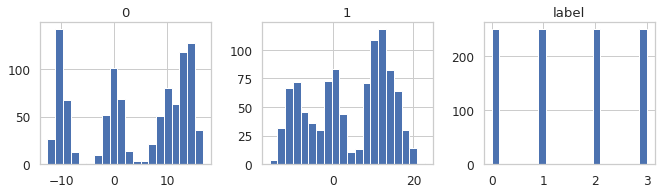

In [ ]:

Train_Data.hist(bins=20, figsize=(15, 6), layout=(2, 4));

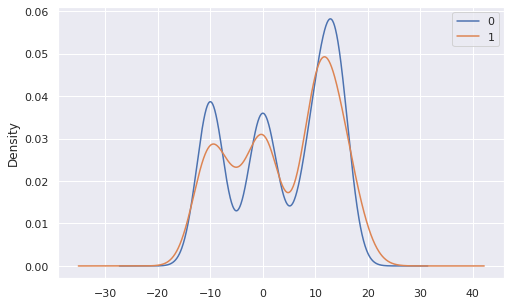

In [ ]:
Train_Data[[0,1]].plot.kde()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



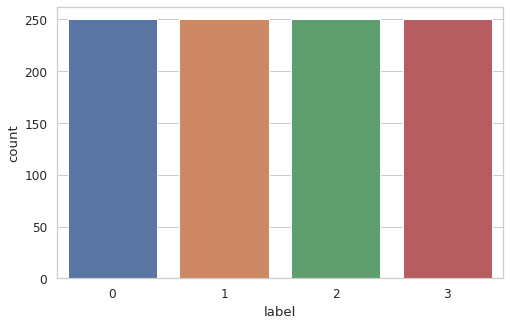

In [ ]:
sns.countplot(Train_Data['label']);

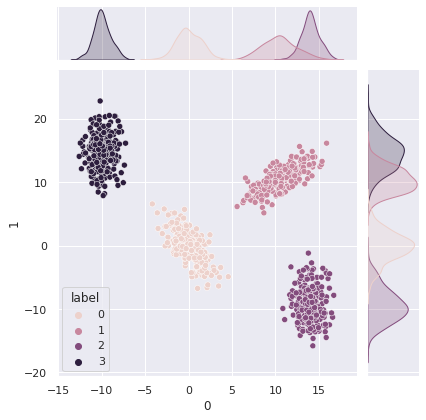

In [ ]:
sns.set(style="darkgrid")

sns.jointplot(data=Train_Data,x=Train_Data[0], y=Train_Data[1],hue='label');

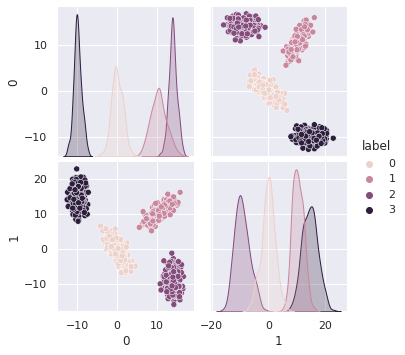

In [ ]:
sns.pairplot(Train_Data,hue='label')
plt.show()

In [ ]:
# f,ax = plt.subplots(figsize =(20,10))
# sns.boxplot(x=0 , y=1, hue="label",data=Train_Data,palette="PRGn",ax=ax)
# plt.show()

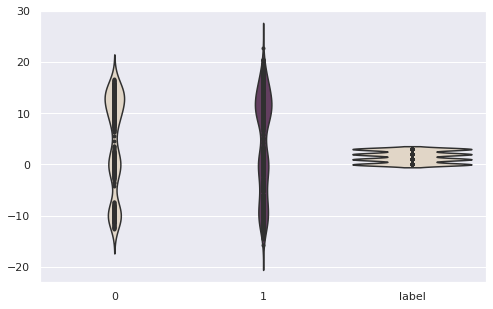

In [ ]:
pal=sns.cubehelix_palette(2,rot=.5,dark=.3)
sns.violinplot(data=Train_Data, palette=pal, inner="points")
plt.show()

We can visualize the correlation between HeatMap and the features in our dataset.

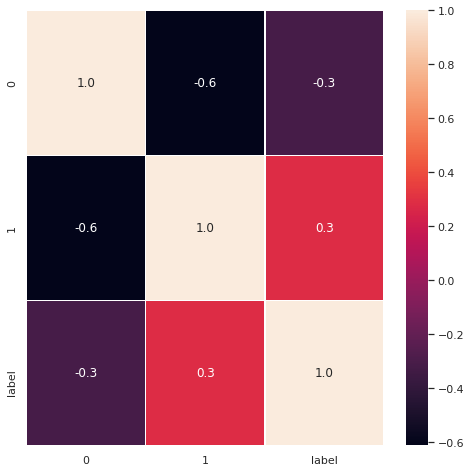

In [ ]:
f,ax=plt.subplots(figsize=(8,8))
sns.heatmap(Train_Data.corr(),annot=True,linewidth=.5,fmt='.1f',ax=ax)
plt.show()

In [ ]:
y=Train_Data["label"]
print(y.shape)
X=Train_Data.iloc[:,:2]

y_val=Val_data["label"]
print(y_val.shape)
X_val=Val_data.iloc[:,:2]

(1000,)
(600,)


In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X_val, y_val, test_size=0.33,stratify=y_val)
# X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
y_train_1hot=tf.one_hot(y, 4)
y_val_1hot=tf.one_hot(y_val, 4)
print(y_val_1hot)

tf.Tensor(
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]], shape=(600, 4), dtype=float32)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow import keras
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
 model = keras.Sequential(
    [
        Dense(2, activation="relu", name="Hidden_Layer_1",input_shape=(2,)), 
             
        
        
        Dense(4, activation="softmax", name="Output_Layer")
    ]
)


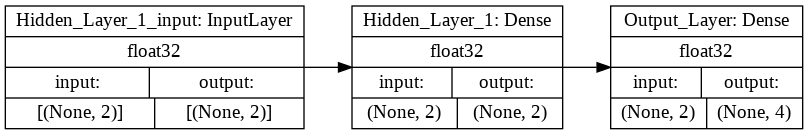

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True, show_dtype=True,show_layer_names=True, rankdir='LR', expand_nested=True, dpi=96)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Hidden_Layer_1 (Dense)       (None, 2)                 6         
_________________________________________________________________
Output_Layer (Dense)         (None, 4)                 12        
Total params: 18
Trainable params: 18
Non-trainable params: 0
_________________________________________________________________


In [ ]:
opt_var=tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt_var,loss='categorical_crossentropy',metrics=['accuracy'])

#using call back to store best model
# checkpoint_filepath = '/content/drive/MyDrive/Machine Learning/Neural Networks/Synthetic_data'
# model_checkpoint_callback = ModelCheckpoint(
#     filepath=checkpoint_filepath,
#     save_weights_only=True,
#     monitor='val_accuracy',
#     mode='max',
#     save_best_only=True)
#model fit
hist=model.fit(X,y_train_1hot,validation_data=(X_val,y_val_1hot),verbose=1,epochs=50,batch_size=1)
# hist=model.fit(X,y_train_1hot,validation_data=(X_val,y_val_1hot),verbose=1,epochs=100,batch_size=5, callbacks=[model_checkpoint_callback],shuffle=True)
# The model weights (that are considered the best) are loaded into the model.
# model.load_weights(checkpoint_filepath)


Epoch 1/50
1000/1000 [==============================] - 2s 1ms/step - loss: 0.0478 - accuracy: 0.9844 - val_loss: 0.0635 - val_accuracy: 0.9833
Epoch 2/50
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0442 - accuracy: 0.9870 - val_loss: 0.0493 - val_accuracy: 0.9833
Epoch 3/50
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0336 - accuracy: 0.9901 - val_loss: 0.0232 - val_accuracy: 0.9950
Epoch 4/50
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0381 - accuracy: 0.9830 - val_loss: 0.0189 - val_accuracy: 0.9950
Epoch 5/50
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0530 - accuracy: 0.9807 - val_loss: 0.0248 - val_accuracy: 0.9933
Epoch 6/50
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0439 - accuracy: 0.9788 - val_loss: 0.0304 - val_accuracy: 0.9900
Epoch 7/50
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0226 - accuracy: 0.9953 - val_loss: 0.0194 - val_accuracy:

Prediction Code

In [ ]:
def predict(model,X):
        y_pred = model.predict(X)
        return np.argmax(y_pred, axis=1)

In [ ]:
test=[[-10.045, 16.71]]
print("Data beongs to class ", predict(model,test)[0])
# X_val.to_numpy()

Data beongs to class  3


In [ ]:
#check highest score achieved by model while training
best_score = max(hist.history['val_accuracy'])
score = max(hist.history['accuracy'])

print("validation ",best_score)
print("Train data ",score)

validation  1.0
Train data  1.0


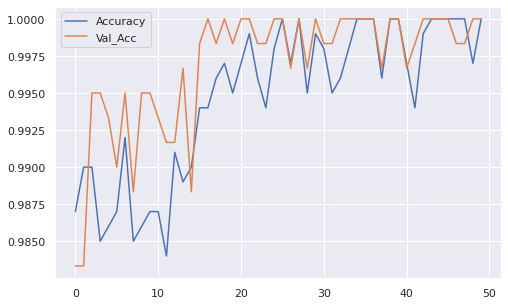

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['Accuracy','Val_Acc'])

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



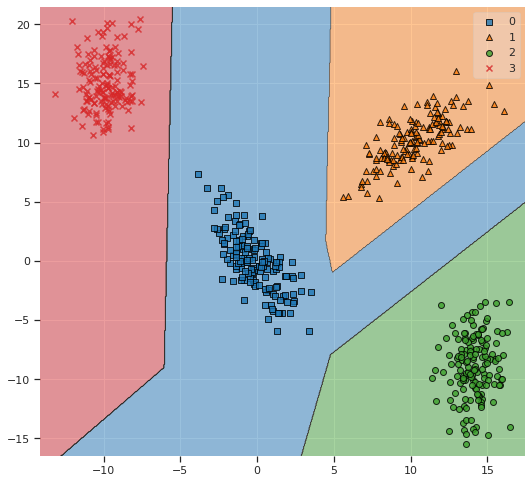

In [ ]:
class Get_Decesion_Boundary(object):

    def __init__(self, model):
        self.model = model

    def predict(self, X):
        y_pred = self.model.predict(X)
        return np.argmax(y_pred, axis=1)

keras_model = Get_Decesion_Boundary(model)
plot_decision_regions(X_val.to_numpy(), y_val.to_numpy(), keras_model)

Below Code to plot each Layer wise Node output

1200


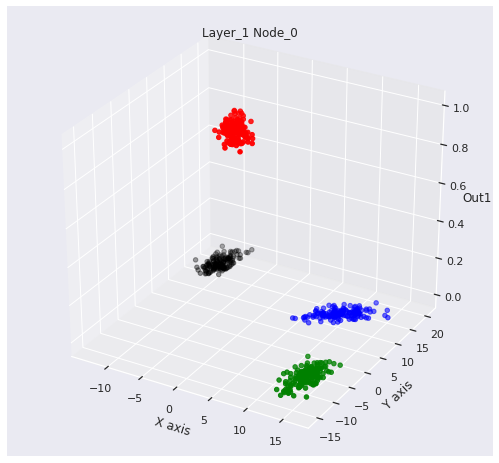

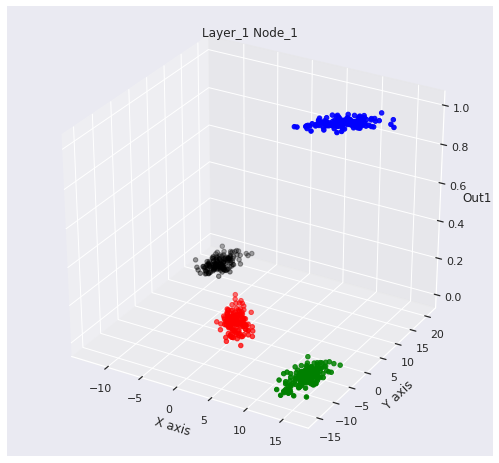

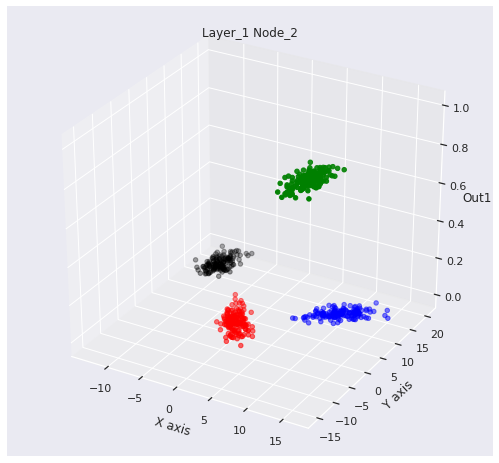

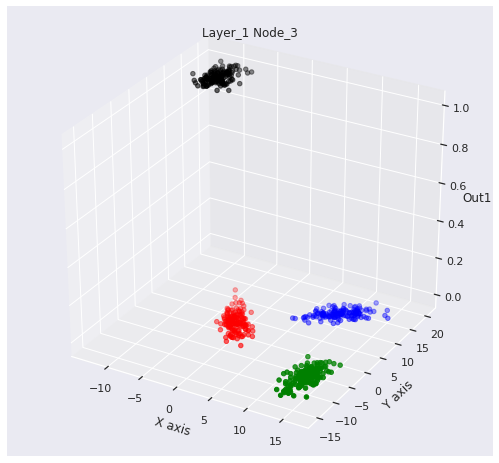

In [ ]:
from tensorflow.keras import backend as K
from mpl_toolkits import mplot3d

class Predictor(object):

    def __init__(self, model):
        self.model = model
        
        

    def predict(self, X):
        y_pred = self.model.predict(X)
        outputs=[]
        for layer in model.layers:            
            keras_function = K.function([model.input], [layer.output])
            outputs.append(keras_function(X)) 
        return np.argmax(y_pred, axis=1),outputs
    
    def getLayerOut(self,Y_PRED,OUTPUTS,y_val):
        
        temp=[]
        for lay in range(len(OUTPUTS)):
            outlist1=[]
            for i in range(len(Y_PRED)):  
                
                for node in range(len(OUTPUTS[lay][0][i])):   
                    outlist1.append([node,X_val.to_numpy()[i],OUTPUTS[lay][0][i][node],y_val.to_numpy()[i]])    #                    
            temp.append(outlist1)
        return temp
    
    def createDataFrame(self,temp):
        layers_list=[]
        for i in range(len(temp)):
            layers_list.append(pd.DataFrame(data=temp[i],columns=['node','input','y_pred','y_actual']))
        return layers_list
    
    def getNodeOut(self,layers_list,layer_in,node_in):
        node=layers_list[layer_in].loc[layers_list[layer_in]['node']==node_in]
        coordinates=node.iloc[:,1:2].to_numpy().tolist()
        colors = {0:'red', 1:'blue', 2:'green', 3:'black'}
        x=[x[0][0] for x in coordinates]
        y=[x[0][1] for x in coordinates]
        out=node['y_pred'].to_numpy().tolist()         
         #plotting function
        sns.set(rc={'figure.figsize':(8.7,8.27)})
        # %matplotlib widget
        fig = plt.figure()
        ax = plt.axes(projection='3d')
        ax.set_title("Layer_"+str(layer_in)+" Node_"+str(node_in))
        ax.set_xlabel('X axis')
        ax.set_ylabel('Y axis')
        ax.set_zlabel('Out1')
        # ax.legend([])
        # Data for three-dimensional scattered points

        ax.scatter3D(x, y, out,c=node['y_actual'].apply(lambda x: colors[x]));
        
        
        

class_model=Predictor(model)
Y_PRED,OUTPUTS=class_model.predict(X_val.to_numpy())

temp=class_model.getLayerOut(Y_PRED,OUTPUTS,y_val)
print(len(temp[0]))
layers_list=class_model.createDataFrame(temp)
for i in range(4):
  class_model.getNodeOut(layers_list,1,i) #input layer and node



